# Pregunta 1

In [126]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

In [172]:
%%file vertices.csv
Item,ID_Calle,Nombre_Calle,ID_Calle_Origen,ID_Calle_Final,ID_Origen_intereccion,ID_Final_Interseccion,distancia_Km,velocidad,Costo1,Costo2,Latitud_Origen_Interseccion,Longitud_Origen_Interseccion,Latitud_Destino_Interseccion,Longitud_Destino_Interseccion
1,4827820,Plaza 2 de Mayo,31035122,31035142,1,6,0.0389729,70,0.0005568,1000000,-12.0459308,-77.0427831,-12.0460958,-77.0430896
2,4827820,Plaza 2 de Mayo,31035142,31035109,6,90275,0.0040401,70,0.0000577,1000000,-12.0460958,-77.0430896,-12.0461253,-77.0431113
3,4827820,Plaza 2 de Mayo,31035109,31035110,90275,79,0.0182271,70,0.0002604,1000000,-12.0461253,-77.0431113,-12.0462768,-77.0431753
4,4827820,Plaza 2 de Mayo,31035110,31035112,79,51668,0.0376738,70,0.0005382,1000000,-12.0462768,-77.0431753,-12.0466033,-77.0431118
5,4827820,Plaza 2 de Mayo,31035112,31035113,51668,7,0.0108272,70,0.0001547,1000000,-12.0466033,-77.0431118,-12.0466783,-77.0430483
6,4827820,Plaza 2 de Mayo,31035113,31035116,7,10,0.0723266,70,0.0010332,1000000,-12.0466783,-77.0430483,-12.0466949,-77.042435
7,4827820,Plaza 2 de Mayo,31035116,31035117,10,89757,0.0229747,70,0.0003282,1000000,-12.0466949,-77.042435,-12.0465202,-77.0423222
8,4827820,Plaza 2 de Mayo,31035117,310954401,89757,3473,0.0077038,70,0.0001101,1000000,-12.0465202,-77.0423222,-12.0464537,-77.0423023
9,4827820,Plaza 2 de Mayo,310954401,31035119,3473,3472,0.0283858,70,0.0004055,1000000,-12.0464537,-77.0423023,-12.0462019,-77.0423251
10,4827820,Plaza 2 de Mayo,31035119,31035121,3472,2,0.0410751,70,0.0005868,1000000,-12.0462019,-77.0423251,-12.0459528,-77.0425923
11,4827820,Plaza 2 de Mayo,31035121,31035122,2,1,0.0209908,70,0.0002999,1000000,-12.0459528,-77.0425923,-12.0459308,-77.0427831
14,4827822,Plaza Ramon Castilla,31035125,1701657053,3,4,0.0347841,70,0.0004969,0.0004969,-12.0437464,-77.0427216,-12.0435317,-77.0424959
18,4827827,Alfonso Ugarte,31035113,915282067,7,20398,0.114548,70,0.0016364,1000000,-12.0466783,-77.0430483,-12.0476133,-77.0427867
19,4827827,Alfonso Ugarte,915282067,1830379614,20398,89758,0.0635568,70,0.000908,1000000,-12.0476133,-77.0427867,-12.0481839,-77.0427525
20,4827827,Alfonso Ugarte,1830379614,1834904133,89758,25784,0.1010591,70,0.0014437,1000000,-12.0481839,-77.0427525,-12.0490875,-77.0426528
21,4827827,Alfonso Ugarte,1834904133,1834904233,25784,25783,0.1550278,70,0.0022147,1000000,-12.0490875,-77.0426528,-12.0504785,-77.0425563
22,4827827,Alfonso Ugarte,1834904233,310953976,25783,3456,0.0374161,70,0.0005345,1000000,-12.0504785,-77.0425563,-12.0508129,-77.042518
23,4827827,Alfonso Ugarte,310953976,525863374,3456,10285,0.1255678,70,0.0017938,1000000,-12.0508129,-77.042518,-12.051938,-77.042419
24,4827827,Alfonso Ugarte,525863374,912508069,10285,20279,0.1646514,70,0.0023522,1000000,-12.051938,-77.042419,-12.0534139,-77.0422966
25,4827827,Alfonso Ugarte,912508069,915282634,20279,2996,0.1194252,70,0.0017061,1000000,-12.0534139,-77.0422966,-12.054484,-77.0422029
26,4827827,Alfonso Ugarte,915282634,912508037,2996,61002,0.1045035,70,0.0014929,1000000,-12.054484,-77.0422029,-12.0554202,-77.0421186
27,4827827,Alfonso Ugarte,912508037,1354143299,61002,51747,0.0878776,70,0.0012554,1000000,-12.0554202,-77.0421186,-12.056207,-77.0420426
28,4827827,Alfonso Ugarte,1354143299,2053915199,51747,93140,0.0600874,70,0.0008584,1000000,-12.056207,-77.0420426,-12.0567463,-77.0420077
29,4827827,Alfonso Ugarte,2053915199,593974687,93140,90309,0.0477427,70,0.000682,1000000,-12.0567463,-77.0420077,-12.0571748,-77.0419799
30,4827827,Alfonso Ugarte,593974687,593974689,90309,10593,0.0989071,70,0.001413,1000000,-12.0571748,-77.0419799,-12.0580606,-77.0418971
31,4827827,Alfonso Ugarte,593974689,912507979,10593,20265,0.0714842,70,0.0010212,1000000,-12.0580606,-77.0418971,-12.058701,-77.0418395
32,4827827,Alfonso Ugarte,912507979,107774938,20265,8,0.1159056,70,0.0016558,1000000,-12.058701,-77.0418395,-12.0597402,-77.0417789
33,4827828,Alfonso Ugarte,107774958,1856633195,9,90834,0.1676419,70,0.0023949,1000000,-12.0597176,-77.0414237,-12.0582271,-77.041607
34,4827828,Alfonso Ugarte,1856633195,107772857,90834,90833,0.01183,70,0.000169,1000000,-12.0582271,-77.041607,-12.0581253,-77.0415754
35,4827828,Alfonso Ugarte,107772857,107772858,90833,51748,0.2161246,70,0.0030875,1000000,-12.0581253,-77.0415754,-12.0561917,-77.0417773
36,4827828,Alfonso Ugarte,107772858,31035148,51748,10284,0.1932179,70,0.0027603,1000000,-12.0561917,-77.0417773,-12.0544607,-77.0419326
37,4827828,Alfonso Ugarte,31035148,912508049,10284,20140,0.2303417,70,0.0032906,1000000,-12.0544607,-77.0419326,-12.0523964,-77.0421092
38,4827828,Alfonso Ugarte,912508049,912507969,20140,20106,0.0644799,70,0.0009211,1000000,-12.0523964,-77.0421092,-12.051819,-77.042164
39,4827828,Alfonso Ugarte,912507969,525863808,20106,10287,0.1093054,70,0.0015615,1000000,-12.051819,-77.042164,-12.0508402,-77.0422569
40,4827828,Alfonso Ugarte,525863808,31035172,10287,20101,0.0784361,70,0.0011205,1000000,-12.0508402,-77.0422569,-12.0501363,-77.0423038
41,4827828,Alfonso Ugarte,31035172,912508039,20101,20107,0.0715541,70,0.0010222,1000000,-12.0501363,-77.0423038,-12.0494928,-77.0423052
42,4827828,Alfonso Ugarte,912508039,1841915460,20107,20136,0.1346623,70,0.0019237,1000000,-12.0494928,-77.0423052,-12.0482875,-77.0424257
43,4827828,Alfonso Ugarte,1841915460,912508022,20136,20131,0.0639633,70,0.0009138,1000000,-12.0482875,-77.0424257,-12.047715,-77.042483
44,4827828,Alfonso Ugarte,912508022,31035116,20131,10,0.1178761,70,0.0016839,1000000,-12.047715,-77.042483,-12.0466949,-77.042435
45,4827829,Alfonso Ugarte,31035131,1617076657,11,65165,0.1448711,60,0.0024145,0.0024145,-12.0429406,-77.0428589,-12.0416523,-77.0430249
46,4827829,Alfonso Ugarte,1617076657,2397243489,65165,26831,0.0215733,60,0.0003596,0.0003596,-12.0416523,-77.0430249,-12.0414592,-77.0430441
47,4827829,Alfonso Ugarte,2397243489,2397243477,26831,37013,0.0161986,60,0.00027,0.00027,-12.0414592,-77.0430441,-12.0413142,-77.0430584
48,4827829,Alfonso Ugarte,2397243477,31035152,37013,12,0.1028857,60,0.0017148,0.0017148,-12.0413142,-77.0430584,-12.0404055,-77.0432194
53,4827832,Alfonso Ugarte,31035159,309998239,13,15,0.2841521,70,0.0040593,0.0040593,-12.040437,-77.0433858,-12.0429803,-77.0431366
54,4827838,Alfonso Ugarte,309998242,31035152,16,12,0.2843093,70,0.0040616,0.0040616,-12.0429513,-77.0429851,-12.0404055,-77.0432194
55,4827843,Plaza Francisco Bolognesi,2053915269,107774936,17,93168,0.0142102,70,0.000203,1000000,-12.0596939,-77.0415471,-12.0597048,-77.0416773
56,4827843,Plaza Francisco Bolognesi,107774936,107774938,93168,8,0.0117283,70,0.0001675,1000000,-12.0597048,-77.0416773,-12.0597402,-77.0417789
57,4827843,Plaza Francisco Bolognesi,107774938,107774940,8,3765,0.0419663,70,0.0005995,1000000,-12.0597402,-77.0417789,-12.0600042,-77.0420464
58,4827843,Plaza Francisco Bolognesi,107774940,107774941,3765,12773,0.0151546,70,0.0002165,1000000,-12.0600042,-77.0420464,-12.0601274,-77.042106


Overwriting vertices.csv


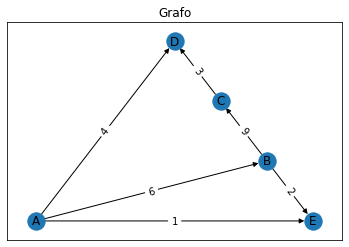

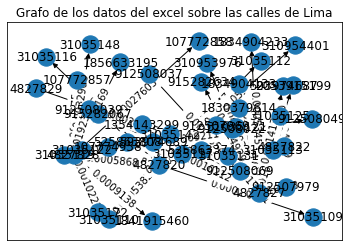

In [182]:
def agregar_arista(G,u,v,w=1,di=True):
    G.add_edge(u,v,weight=w)

    if not di:
        G.add_edge(v,u,weight=w)

#Prueba de grafo ponderado con datos de las calles
def leer_csv(F):
    #Lectura de datos para la impresión del grafo ponderado de las calles
    datos=pd.read_csv('vertices.csv',header=0)
    idcalle=datos['ID_Calle']
    idorigeninterseccion=datos['ID_Calle_Origen']
    costo=datos['Costo1']
    for i in range(0,40):
        agregar_arista(F, idcalle[i], idorigeninterseccion[i], costo[i])
        
if __name__=="__main__":    
    
    F = nx.DiGraph()
    leer_csv(F)
    G = nx.DiGraph()
    #Grafo ponderado
    agregar_arista(G,"A","B",6)
    agregar_arista(G,"A","D",4)
    agregar_arista(G,"A","E",1)
    agregar_arista(G,"B","C",9)
    agregar_arista(G,"B","E",2)
    agregar_arista(G,"C","D",3)
    
    pos=nx.layout.planar_layout(G)
    nx.draw_networkx(G, pos)
    labels=nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    plt.title("Grafo")
    plt.show()
    
    pos=nx.layout.random_layout(F)
    nx.draw_networkx(F, pos)
    labels=nx.get_edge_attributes(F, 'weight')
    nx.draw_networkx_edge_labels(F,pos,edge_labels=labels)
    plt.title("Grafo de los datos del excel sobre las calles de Lima")
    plt.show()
    